<a href="https://colab.research.google.com/github/keerth3304/Linear-Algebra_the-coding-way/blob/main/Eigen%20Values%20and%20Vectors/EigenValuesVectors_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

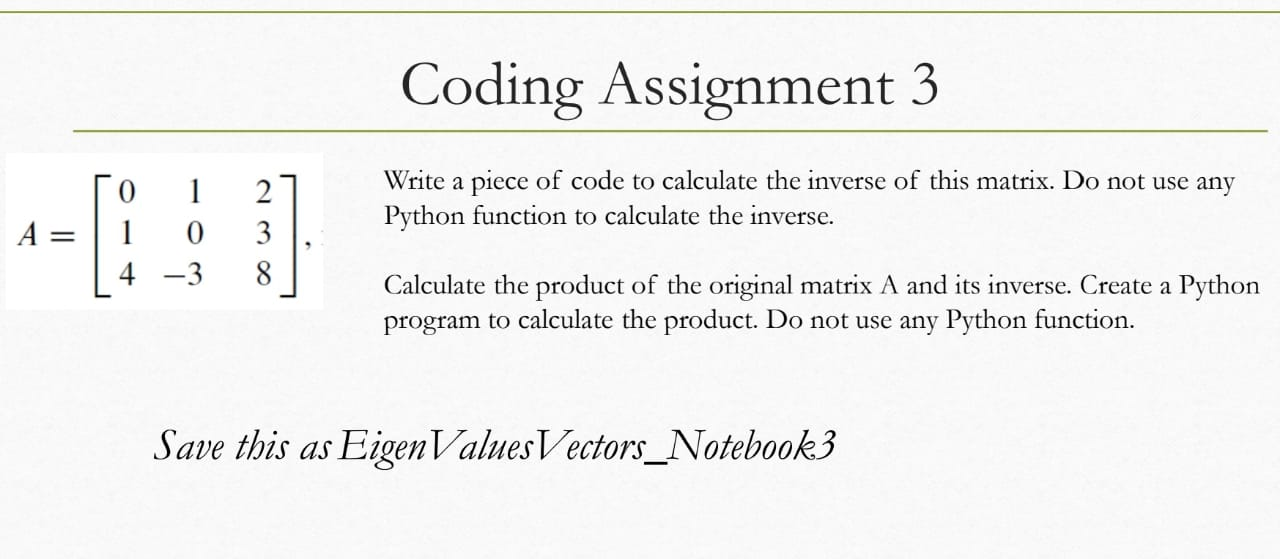

In [ ]:
import numpy as np

In [ ]:
def matrix_multiply(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Number of columns in the first matrix must equal the number of rows in the second matrix.")

    result = []
    for i in range(len(A)):
        row = []
        for j in range(len(B[0])):
            sum = 0
            for k in range(len(B)):
                sum += A[i][k] * B[k][j]
            row.append(sum)
        result.append(row)

    return np.array(result)

In [ ]:
import numpy as np

def rref_with_inverse(matrix):
    A = np.array(matrix, dtype=float)
    rows, cols = A.shape
    lead = 0

    # Create an identity matrix of the same size as A
    identity_matrix = np.eye(rows)

    for r in range(rows):
        if lead >= cols:  #if the leand is greater then column then the matrix is already in RREF
            break
        i = r

        #this loop check if the current element if pivot(non zero) if it is zero it swaps it with the row which has non zero entry
        while A[i, lead] == 0:
            i += 1
            if i == rows:
                i = r
                lead += 1
                if cols == lead:
                    break
        if A[i, lead] != 0:
            A[[i, r]] = A[[r, i]]
            identity_matrix[[i, r]] = identity_matrix[[r, i]]

            #normalize the pivot row making the pivot equal to 1
            lv = A[r, lead]
            A[r] = A[r] / lv
            identity_matrix[r] = identity_matrix[r] / lv

            #Eliminate Entries Below Pivot: For each row other than the pivot row (r),
            #the algorithm subtracts multiples of the pivot row from the current row to eliminate the entries below the pivot
            for i in range(rows):
                if i != r:
                    lv = A[i, lead]
                    A[i] = A[i] - lv * A[r]
                    identity_matrix[i] = identity_matrix[i] - lv * identity_matrix[r]
            lead += 1

    # Check if the original matrix is invertible
    if np.any(np.diag(A) == 0):
        return "Matrix is not invertible"

    # Scale the rows of A to make the diagonal entries equal to 1
    for r in range(rows):
        lv = A[r, r]
        A[r] = A[r] / lv
        identity_matrix[r] = identity_matrix[r] / lv

    return identity_matrix


In [ ]:
A = [[0, 1, 2],
      [1, 0, 3],
      [4, -3, 8]]

inverse_matrix = rref_with_inverse(A)
print("Inverse Matrix:")
print(inverse_matrix)

Inverse Matrix:
[[-4.5  7.  -1.5]
 [-2.   4.  -1. ]
 [ 1.5 -2.   0.5]]


In [ ]:
print("Product of Original matrix & its inverse:\n",matrix_multiply(A, inverse_matrix))

Product of Original matrix & its inverse:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
